In [2]:
import cv2
import os
import matplotlib.pyplot as plt


def region_focus(img_path, out_path, start_row, start_col, size, scale, line_width, gray):
    '''
    img_path: 输入图像的路径
    out_path: 输出图像的路径
    start_row: 框的左上锚点的行号
    start_col: 框的左上锚点的列号
    size: 框的大小（二元组）
    scale: 放大倍数
    line_width: 框的线宽
    gray: 是否为灰度图
    '''
    if gray:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        H, W = img.shape
        new_img = img.copy()
        sub_img = img[start_row: start_row + size[0], start_col: start_col + size[1]]   # 抠图
        sub_img = cv2.resize(sub_img, None, fx=scale, fy=scale)                         # 放大抠图
        h, w = sub_img.shape
        new_img[-h - line_width: -line_width, -w - line_width: -line_width] = sub_img   # 抠图覆盖到原图右下角
        new_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2BGR)                             # 转成bgr，不然画的框是白色的
    else:
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        H, W, C = img.shape
        new_img = img.copy()
        sub_img = img[start_row: start_row + size[0], start_col: start_col + size[1], :]
        sub_img = cv2.resize(sub_img, None, fx=scale, fy=scale)
        h, w, c = sub_img.shape
        new_img[-h - line_width: -line_width, -w - line_width: -line_width, :] = sub_img
        
    cv2.rectangle(new_img, [start_col, start_row], [start_col + size[1], start_row + size[0]], [0, 0, 255], line_width)             # 画抠图的框
    cv2.rectangle(new_img, [W - w - line_width, H - h - line_width], [W - line_width, H - line_width], [0, 0, 255], line_width)     # 画放大的右下角的子图的框
    cv2.imwrite(out_path, new_img)
    print(img_path, "\t==>\t", out_path)



(480, 640)
(50, 50)


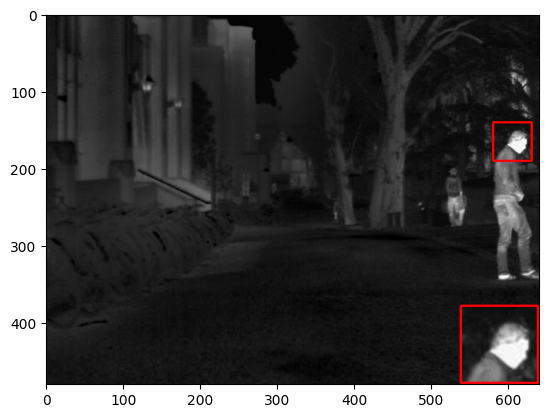

In [3]:
img_path = 'D:/dataset/MSRS/test/Ir/01086N.png'
start_row = 140
start_col = 580
size = [50, 50]
scale = 2.
line_width = 2
gray = True

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
H, W = img.shape
print(img.shape)
new_img = img.copy()
sub_img = img[start_row: start_row + size[0], start_col: start_col + size[1]]
print(sub_img.shape)

sub_img = cv2.resize(sub_img, None, fx=scale, fy=scale)
h, w = sub_img.shape
new_img[-h - line_width: -line_width, -w - line_width: -line_width] = sub_img
new_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2BGR)

cv2.rectangle(new_img, [start_col, start_row], [start_col + size[1], start_row + size[0]], [255, 0, 0], line_width)
cv2.rectangle(new_img, [W - w - line_width, H - h - line_width], [W - line_width, H - line_width], [255, 0, 0], line_width)

plt.imshow(new_img)
plt.show()

In [4]:
sota_image_root = 'D:/PycharmProjects/SOTA_IMAGES'
sota_list = ['DeFusion', 'LDRepFM', 'MUFusion', 'PMGI', 'SDNet', 'SwinFusion', 'TUFusion', 'U2Fusion', 'fusinn_image']

dataset_name = 'MSRS'
dataset_root_1 = f'D:/dataset/{dataset_name}/test/Vis'
dataset_root_2 = f'D:/dataset/{dataset_name}/test/Ir'

out_root = f'D:/SOTA_visual/{dataset_name}'
os.makedirs(out_root, exist_ok=True)

img_name = '01086N.png'

# 按索引读图片，不会受到文件名的影响
imgs = sorted(os.listdir(dataset_root_1))
idx = imgs.index(img_name)

for method in sota_list:
    path = os.path.join(sota_image_root, method, dataset_name)
    sota_images = sorted(os.listdir(path))
    draw_img = os.path.join(path, sota_images[idx])
    print(draw_img)
    
    out_path = os.path.join(out_root, method + ".jpg")
    print(out_path)
    region_focus(draw_img, out_path, start_row, start_col, size, scale, line_width, gray)

draw_img = os.path.join(dataset_root_1, img_name)
out_path = os.path.join(out_root,  "src1.jpg")
region_focus(draw_img, out_path, start_row, start_col, size, scale, line_width, gray)
draw_img = os.path.join(dataset_root_2, img_name)
out_path = os.path.join(out_root,  "src2.jpg")
region_focus(draw_img, out_path, start_row, start_col, size, scale, line_width, gray)
    
    
    

D:/PycharmProjects/SOTA_IMAGES\DeFusion\MSRS\01086N_recover.png
D:/SOTA_visual/MSRS\DeFusion.jpg
D:/PycharmProjects/SOTA_IMAGES\DeFusion\MSRS\01086N_recover.png 	==>	 D:/SOTA_visual/MSRS\DeFusion.jpg
D:/PycharmProjects/SOTA_IMAGES\LDRepFM\MSRS\01086N.png
D:/SOTA_visual/MSRS\LDRepFM.jpg
D:/PycharmProjects/SOTA_IMAGES\LDRepFM\MSRS\01086N.png 	==>	 D:/SOTA_visual/MSRS\LDRepFM.jpg
D:/PycharmProjects/SOTA_IMAGES\MUFusion\MSRS\01086N.png
D:/SOTA_visual/MSRS\MUFusion.jpg
D:/PycharmProjects/SOTA_IMAGES\MUFusion\MSRS\01086N.png 	==>	 D:/SOTA_visual/MSRS\MUFusion.jpg
D:/PycharmProjects/SOTA_IMAGES\PMGI\MSRS\01086N.png
D:/SOTA_visual/MSRS\PMGI.jpg
D:/PycharmProjects/SOTA_IMAGES\PMGI\MSRS\01086N.png 	==>	 D:/SOTA_visual/MSRS\PMGI.jpg
D:/PycharmProjects/SOTA_IMAGES\SDNet\MSRS\01086N.png
D:/SOTA_visual/MSRS\SDNet.jpg
D:/PycharmProjects/SOTA_IMAGES\SDNet\MSRS\01086N.png 	==>	 D:/SOTA_visual/MSRS\SDNet.jpg
D:/PycharmProjects/SOTA_IMAGES\SwinFusion\MSRS\01086N.png
D:/SOTA_visual/MSRS\SwinFusion.jpg
D:/